In [1]:
import pandas as pd
# Load data
data = pd.read_csv('sample/data_435.csv')
print(data.head())

   Unnamed: 0         A         B         C         D
0           0  0.506398  0.128444 -0.601712  1.377955
1           1  6.566043 -0.201448  0.020567  6.767491
2           2  2.125280 -0.371385  1.104718  4.496665
3           3 -0.307083 -0.074210 -1.260847 -0.232873
4           4  1.399106  1.780892 -0.273860 -0.381786


We want to figure out what which of the 4 nodes to intervene on. Firstly, we find the distribution of each of the nodes.

In [2]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [3]:
# Test get_best_distribution
print(get_best_distribution(data["A"]))

p value for norm = 0.37301650062939434
p value for exponweib = 0.9443011596570293
p value for weibull_max = 1.5459005963754395e-61
p value for weibull_min = 1.3928661247093091e-30
p value for pareto = 2.253683580563793e-06
p value for genextreme = 0.9131069143327561
Best fitting distribution: exponweib
Best p value: 0.9443011596570293
Parameters for the best fit: (55.020604615753314, 1.8132669680304456, -11.143329953518474, 5.516877427617473)
exponweib


/Users/augusttollerup/Documents/SEM4/Active-ML/Miniproject2/CausalInference/causal-inference/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2640: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


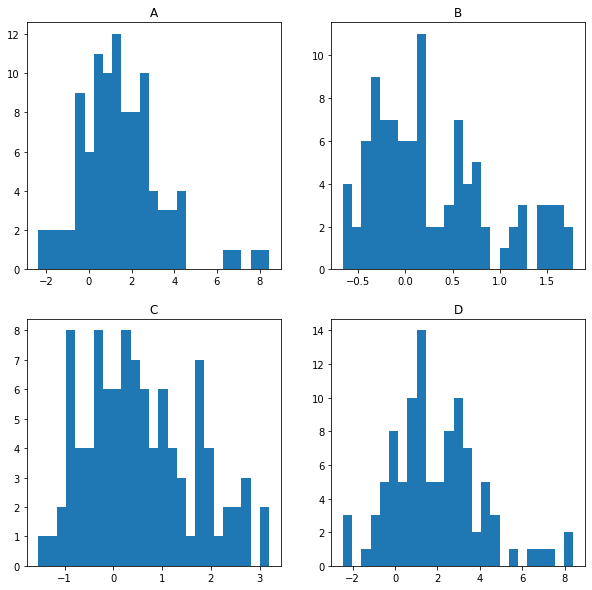

In [5]:
# Plot 4 histograms
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0, 0].hist(data['A'], bins=25)
ax[0, 1].hist(data['B'], bins=25)
ax[1, 0].hist(data['C'], bins=25)
ax[1, 1].hist(data['D'], bins=25)
ax[0, 0].set_title('A')
ax[0, 1].set_title('B')
ax[1, 0].set_title('C')
ax[1, 1].set_title('D')
plt.show()